#### 3.*** Cross-validation

Write code (R, Python) to assess the usefulness of cross-validation.

The inputs comprise a vector of values {1,2, 3, …, 100}, a function f and CV option

CV options include: random splitting, LOOCV, k-fold CV

The function f can be linear, quadratic, polynomial, logarithmic, exponential.

k-fold CV make sure that every data point is being used for validation exactly once.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
size = 100
linear_function = lambda x: 2*x + 1
quadratic_function = lambda x: x**2 + 5 * x + 9
polynomial_function = lambda x: x**3 + 5 * x**2 - 3 * x + 11
log_function = lambda x: np.log(x + 1)
exp_function = lambda x: np.exp(x / 10)
noise = lambda: [np.random.normal(0,0.1) for _ in range(size)]

In [28]:
my_x = np.arange(1, size + 1)

my_y_linear     = linear_function(my_x) + noise()

my_y_quadratic  = quadratic_function(my_x) + noise()

my_y_polynomial = polynomial_function(my_x) + noise()

my_y_log        = log_function(my_x) + noise()

my_y_exp        = exp_function(my_x) + noise()



In [29]:
data = pd.DataFrame({'x': my_x, 'y_linear': my_y_linear, 'y_quadratic': my_y_quadratic, 'y_polynomial': my_y_polynomial, 'y_log': my_y_log, 'y_exp': my_y_exp}) 

In [30]:
data

,x,y_linear,y_quadratic,y_polynomial,y_log,y_exp
0,1,3.009626,14.781669,1.385547e+01,0.644260,1.114052
1,2,5.106228,23.085554,3.294751e+01,0.956536,1.124856
2,3,6.887792,32.953941,7.392961e+01,1.293944,1.436748
3,4,8.888037,45.104055,1.431013e+02,1.475830,1.607395
4,5,10.964138,59.121399,2.460221e+02,1.767316,1.768934
...,...,...,...,...,...,...
95,96,192.878083,9704.949252,9.305390e+05,4.520664,14764.764831
96,97,195.054069,9902.952171,9.594379e+05,4.738930,16317.582420
97,98,197.086719,10102.985161,9.889289e+05,4.401125,18033.715199
98,99,198.979837,10305.114491,1.019018e+06,4.600142,19930.370203


### Step 3: calculate the errors for the whole domain/ codomain
$$
M S E=\frac{1}{n} \sum_{i=1}^n\left(y_i-\widehat{y}_l\right)^2
$$

In [31]:
# Using model that are the same as the function earlier defined, 
func_list = [None, linear_function, quadratic_function, polynomial_function, log_function ,exp_function]

In [32]:
n = data.shape[0]

for i, column in enumerate(list(data.columns)):
    if i == 0 : continue
    MSE = 1/n * sum([ (a-b)**2 for a, b in zip(data[column].tolist(),(func_list[i](data.x).tolist()))])
    print (MSE)

0.010312242452426559
0.0100296741603536
0.01149238358975773
0.011174769528985287
0.006816579491999509


In [33]:
# Use my own model that has customisable parameters such as the error functions, the order of the polynomial, and initial guess of coeeficients
import MyModel

In [34]:
### Test the linear function, the expected coefficients should be close to [1, 2]
x = data["x"].to_numpy()
y = data["y_linear"].to_numpy()
model = MyModel.MyModel(order = 1, loss_function="MSE")
model.fit(x,y)
print ("The coefficient are: ", model.coefficients)
print ("The value of loss function is:", model.loss)

The coefficient are:  [0.8011609  2.00289827]
The value of loss function is: 0.02015312825170518


In [35]:
### Test the linear function, but with a quadratic model, the expected coefficients are [1, 2, 0]?
x = data["x"].to_numpy()
y = data["y_linear"].to_numpy()
model = MyModel.MyModel(order = 2, loss_function="MSE")
model.fit(x,y)
print ("The coefficient are: ", model.coefficients)
print ("The value of loss function is:", model.loss)

The coefficient are:  [ 5.67437440e-01  2.01664671e+00 -1.36123154e-04]
The value of loss function is: 0.03188889042716339


In [36]:
### Test the quadratic function, the expected output is [9, 5, 1]
y = data["y_quadratic"].to_numpy()
model = MyModel.MyModel(order = 2, loss_function="MSE")
model.fit(x,y)
print ("The coefficient are: ", model.coefficients)
print ("The value of loss function is:", model.loss)

The coefficient are:  [8.59955625 5.01668427 0.99985839]
The value of loss function is: 0.03122968982859889


In [37]:
### Test the polynomial function, the expected output is [11, -3, 5, 1]
y = data["y_polynomial"].to_numpy()
model = MyModel.MyModel(order = 3, loss_function="MSE")
model.fit(x,y)
print ("The coefficient are: ", model.coefficients)
print ("The value of loss function is:", model.loss)

The coefficient are:  [10.2084296  -2.94705668  4.99902481  1.00000533]
The value of loss function is: 0.046814553713171836


In [38]:
# Try to force fit the log function with a polynomial model
y = data["y_log"].to_numpy()
model = MyModel.MyModel(initial_coefficients = [0, 1, -1/2, 1/3, -1/4, 1/5, -1/6], order = 6, loss_function = "MSE")
model.fit(x,y)
print ("The coefficient are: ", model.coefficients)
print ("The value of loss function is:", model.loss)

The coefficient are:  [ 8.88462118e-08  1.00000506e+00 -4.99827679e-01  3.37624923e-01
 -2.33398791e-01  5.98661372e-03 -3.76528966e-05]
The value of loss function is: 39118137440.99298


In [39]:
# Try to force fit the exp function with a polynomial model
y = data["y_exp"].to_numpy()
model = MyModel.MyModel(initial_coefficients = [1, 1/10, 1/200, 1/6000, 1/240000, 1/(1.2*10**7), 0], order = 6, loss_function = "MSE")
model.fit(x,y)
print ("The coefficient are: ", model.coefficients)
print ("The value of loss function is:", model.loss)

The coefficient are:  [1.00000000e+00 1.00000000e-01 5.00000000e-03 1.66666667e-04
 4.16666848e-06 8.35025383e-08 8.60763282e-09]
The value of loss function is: 5621951.43387379


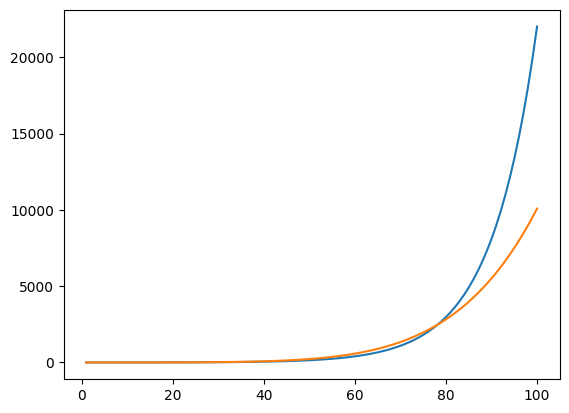

In [40]:
plt.plot(x,y)
plt.plot(x,model.predict(x))
plt.show()

Trying to fit a polynomial function just fails horrendously for log and exp function, as it deviates from the actual function as x becomes large 

### Step 4: perform the Step $1-3$ on a cross-validation setting.

In this question, you are supposed to conduct a LOOCV and a K-fold CV on the data set.

In [41]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [42]:
print (train_data.head())
print (train_data.shape)
print (test_data.head())
print (test_data.shape)

     x    y_linear  y_quadratic   y_polynomial     y_log        y_exp
55  56  112.930144  3425.023263  191138.796401  4.057945   270.387591
88  89  179.198264  8375.062872  744317.843276  4.456481  7331.983496
26  27   54.974120   873.055425   23257.983475  3.167990    14.921537
42  43   86.862105  2073.050866   88634.132569  3.750586    73.677343
69  70  141.087700  5259.034966  367300.968423  4.100794  1096.689412
(80, 6)
     x    y_linear  y_quadratic   y_polynomial     y_log        y_exp
83  84  168.958854  7484.896828  627742.909195  4.438937  4447.241630
53  54  108.934216  3195.159136  171893.218053  4.030561   221.328542
70  71  143.051728  5405.130542  382913.864691  4.247997  1211.975082
45  46   92.995494  2354.956291  107789.104695  3.676200    99.430905
44  45   91.023979  2258.997170  101125.971675  3.704505    90.064015
(20, 6)


In [43]:
x_learn = train_data["x"].to_numpy()
y_learn = train_data["y_linear"].to_numpy()
x_test = test_data["x"].to_numpy()
y_test = test_data["y_linear"].to_numpy()

model = MyModel.MyModel(order = 1, loss_function="MSE")
model.fit(x_learn,y_learn)
model.predict(x_learn)
print (model.coefficients)
print (model.test_loss(x_test,y_test))

[0.79628628 2.00294462]
0.018130709129067318


Looks like a reasonable fit for the linear function and reasonable loss for test data

Step 5: assess the MSEs for the various polynomial models.
Generate a plot similar to the ones presented in the lecture, where on the $\mathrm{X}$-axis we present the degree of the polynomial and on the $y$-axis the MSE.

In [44]:
y = data["y_polynomial"].to_numpy()
max_order = 6
order_of_polynomial = [i for i in range(1, max_order + 1)]
loss = []
for order in range (1, max_order + 1):
    model = MyModel.MyModel(order = order, loss_function="MSE")
    model.fit(x,y)
    loss.append(model.loss)


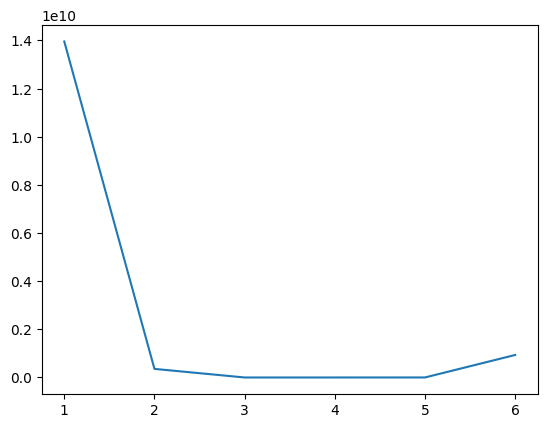

In [45]:
plt.plot(order_of_polynomial, loss)
plt.show()

The first 6 polynomial functions behaves as expected 

In [46]:
max_order = 10
order_of_polynomial = [i for i in range(1, max_order + 1)]
loss = []
for order in range (1, max_order + 1):
    model = MyModel.MyModel(order = order, loss_function="MSE")
    model.fit(x,y)
    loss.append(model.loss)


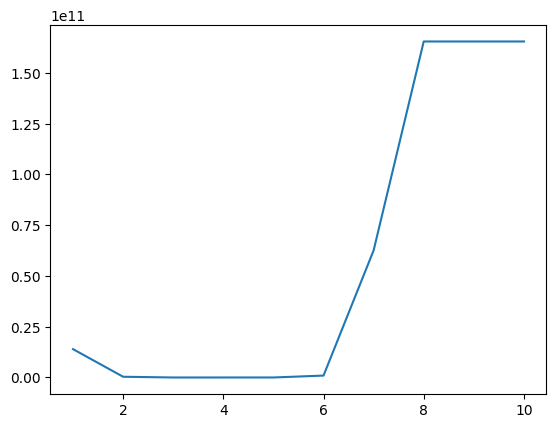

In [47]:
plt.plot(order_of_polynomial, loss)
plt.show()

The MSE became massive as the number of parameters (order of parameter)increases beyond 6, I suspect the model finds the local minimum instead of the global minimum.

I will try to improve that by giving it a better intial guess of the coefficients.

In [48]:
max_order = 10
order_of_polynomial = [i for i in range(1, max_order + 1)]
loss = []
first_few_coefficients = [11,-3, 5, 1]
for order in range (1, max_order + 1):
    if order < 4:
        coefficients =[0]* (order + 1)
    else:
        ### Manually set the inital coefficients to be close to the expected coefficients
        coefficients = first_few_coefficients + ([0] * (order - 3))
    model = MyModel.MyModel(initial_coefficients = coefficients,order = order, loss_function="MSE")
    model.fit(x,y)
    loss.append(model.loss)

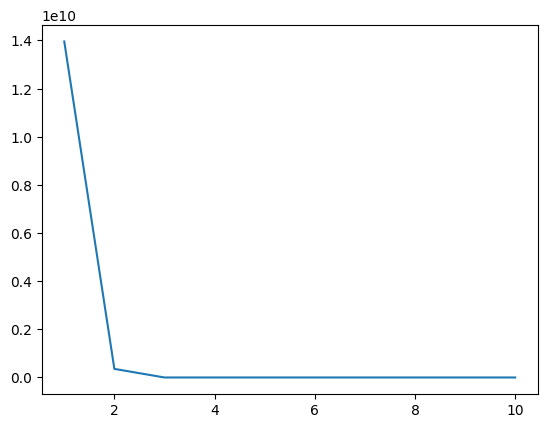

In [49]:
plt.plot(order_of_polynomial, loss)
plt.show()

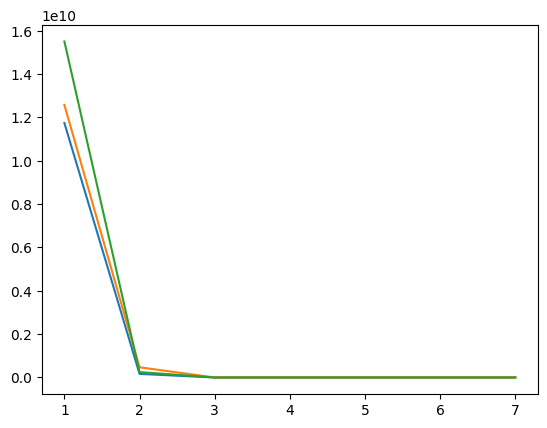

In [50]:
### Cross Validate 3 times

max_order = 7
order_of_polynomial = [i for i in range(1, max_order + 1)]
for validation_no in range(0, 3):
    train_data, test_data = train_test_split(data, test_size=0.05, random_state=42 + validation_no)
    loss = []
    first_few_coefficients = [11,-3, 5, 1]
    x_learn = train_data["x"].to_numpy()
    y_learn = train_data["y_polynomial"].to_numpy()
    x_test = test_data["x"].to_numpy()
    y_test = test_data["y_polynomial"].to_numpy()
    for order in range (1, max_order + 1):
        if order < 4:
            coefficients =[0]* (order + 1)
        else:
            ### Manually set the inital coefficients to be close to the expected coefficients
            coefficients = first_few_coefficients + ([0] * (order - 3))
        model = MyModel.MyModel(initial_coefficients = coefficients,order = order, loss_function="MSE")
        model.fit(x_learn,y_learn)
        loss.append(model.test_loss(x_test,y_test))
    plt.plot(order_of_polynomial, loss)
plt.show()